In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils_fig as uf

from importlib import reload

import sys
sys.path.append("../include")
import hhtools
import hhsignal

uf.set_plt()

# Sample activities (raster, MUA, LFP)
Show sample trajectories of Slow and Fast populations

In [457]:
data = uf.load_pickle("../two_pop_mpi/postdata/activity_sample.pkl")
print(data['attrs'])

craster = ("#d70606", "#003f5c")
details = data["details"]
figwidth = 5.
figheight = 1.5

{'types': ('F', 'S'), 'nids': ([24, 22, 0], [20, 14, 0]), 'fdirs': ('./data/pe_nu_fast/', './data/pe_nu_slow/')}


## Raster plot

Saved figure to fig1_fast


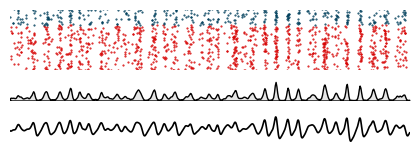

In [458]:
xl = (1500, 2000)

def _remove_axis():
    plt.xticks([])
    plt.yticks([])
    uf.show_spline(plt.gca())

fig = plt.figure(figsize=(figwidth, figheight))

# Raster
plt.axes(position=(0.1, 0.55, 0.8, 0.4))
hhtools.draw_spk(details[0]["step_spk"], xl=xl, colors=craster, color_ranges=(800, 1000), ms=1)
plt.ylim([500, 900])
_remove_axis()

# MUA
plt.axes(position=(0.1, 0.35, 0.8, 0.2))
mua, t = compute_mua(details[0], st=0.001, srate=1000)
t *= 1e3

idt = (t >= xl[0]) & (t < xl[1])
plt.fill_between(t[idt], np.zeros_like(mua[idt])-1, mua[idt]/1000, color=(0.9,0.9,0.9), edgecolor='k')
plt.xlim(xl)
plt.ylim([0, 60])
_remove_axis()

plt.axes(position=(0.1, 0.05, 0.8, 0.22))
t = details[0]["ts"]*1e3
idt = (t >= xl[0]) & (t < xl[1])
plt.plot(t[idt], details[0]["vlfp"][idt], c='k', lw=1.2)
plt.xlim(xl)
plt.ylim([-8, 8])
_remove_axis()

uf.save_fig("fig1_fast")

plt.show()

**Slow population**

Saved figure to fig2_slow


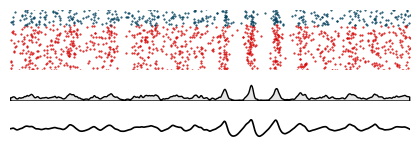

In [459]:
xl = (1800, 2300)

def _remove_axis():
    plt.xticks([])
    plt.yticks([])
    uf.show_spline(plt.gca())

fig = plt.figure(figsize=(figwidth, figheight))

# Raster
plt.axes(position=(0.1, 0.55, 0.8, 0.4))
hhtools.draw_spk(details[1]["step_spk"], xl=xl, colors=craster, color_ranges=(800, 1000), ms=1)
plt.ylim([500, 900])
_remove_axis()

# MUA
plt.axes(position=(0.1, 0.35, 0.8, 0.2))
mua, t = compute_mua(details[1], st=0.001, srate=1000)
t *= 1e3

idt = (t >= xl[0]) & (t < xl[1])
plt.fill_between(t[idt], np.zeros_like(mua[idt])-1, mua[idt]/1000, color=(0.9,0.9,0.9), edgecolor='k')
plt.xlim(xl)
plt.ylim([0, 60])
_remove_axis()

plt.axes(position=(0.1, 0.05, 0.8, 0.22))
t = details[0]["ts"]*1e3
idt = (t >= xl[0]) & (t < xl[1])
plt.plot(t[idt], details[1]["vlfp"][idt], c='k', lw=1.2)
plt.xlim(xl)
plt.ylim([-8, 8])
_remove_axis()

uf.save_fig("fig2_slow")

plt.show()

**Scale bars**

Saved figure to fig1_scalebar_h


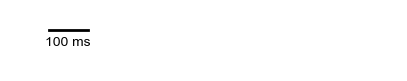

In [460]:
fig = plt.figure(figsize=(figwidth, .8))
uf.show_scalebar(plt.gca(), size=100, label="100 ms",
                 anchor_pos=(1100, 400), color='k', lw=2, pad=3,
                fontsize=10)
plt.xlim((1000, 2000))
plt.ylim([380, 410])
plt.axis("off")
uf.save_fig("fig1_scalebar_h")
plt.show()

In [ ]:
xl = (1500, 2000)

def _remove_axis():
    plt.xticks([])
    plt.yticks([])
    uf.show_spline(plt.gca())

fig = plt.figure(figsize=(figwidth, figheight))

# MUA
plt.axes(position=(0.1, 0.35, 0.8, 0.2))
uf.show_scalebar(plt.gca(), size=20, label="20 %",
                 anchor_pos=(10, 10), color='k', lw=2, pad=3,
                 vh="vertical", fontsize=10)
plt.xlim([0, 500])
plt.ylim([0, 60])
plt.axis("off")

plt.axes(position=(0.1, 0.05, 0.8, 0.22))

uf.show_scalebar(plt.gca(), size=10, label="10 mV",
                 anchor_pos=(10, -5), color='k', lw=2, pad=3,
                 vh="vertical", fontsize=10)
plt.xlim([0, 500])
plt.ylim([-7, 7])

plt.axis("off")

uf.save_fig("fig1_scalebar_v")

plt.show()

Saved figure to fig1_scalebar_v


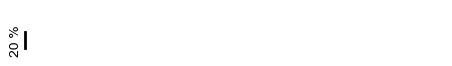

In [450]:
fig = plt.figure(figsize=(figwidth, 0.6))
uf.show_scalebar(plt.gca(), size=20, label="20 %",
                 anchor_pos=(10, 10), color='k', lw=2, pad=3,
                 vh="vertical", fontsize=10)
plt.xlim([0, 500])
plt.ylim([0, 60])

# plt.xlim(xl)
# plt.ylim([380, 410])
plt.axis("off")
uf.save_fig("fig1_scalebar_v")
plt.show()

Saved figure to fig1_scalebar_v_lfp


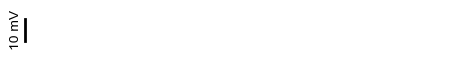

In [451]:
fig = plt.figure(figsize=(figwidth, 0.4))
uf.show_scalebar(plt.gca(), size=10, label="10 mV",
                 anchor_pos=(10, -5), color='k', lw=2, pad=3,
                 vh="vertical", fontsize=10)
plt.xlim([0, 500])
plt.ylim([-7, 7])

plt.axis("off")
uf.save_fig("fig1_scalebar_v_lfp")
plt.show()

# Parameter space

In [359]:
from scipy.ndimage import gaussian_filter

da_fast = uf.load_dataarray("../two_pop_mpi/postdata/pe_nu_fast.nc")
da_slow = uf.load_dataarray("../two_pop_mpi/postdata/pe_nu_slow.nc")

    
def show_contourf(im_array, vmin=0, vmax=1, num=21, cmap="turbo", dc=0.1):
    x = im_array.nu
    y = im_array.pe
    im = gaussian_filter(im_array.data, 1)
    
    plt.contourf(x, y, im,
                 np.concatenate((np.linspace(vmin, vmax, num), [200])),
                 cmap=cmap, vmin=vmin, vmax=vmax)
    # plt.colorbar(ticks=np.arange(vmin, vmax))
    cbar = plt.colorbar(ticks=np.arange(vmin, vmax+dc/2, dc))
    cbar.ax.set_ylim([vmin, vmax])

**Parameter space in Fast population**

Saved figure to fig1_param_space_Fast


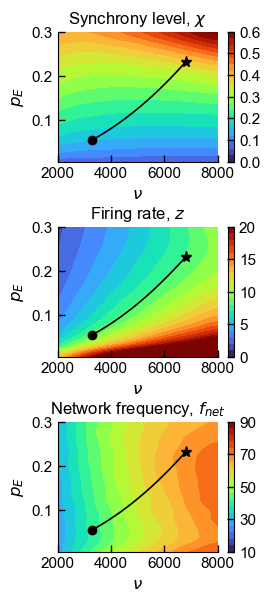

In [360]:
def _set_label():
    plt.xlabel(r"$\nu$", fontsize=12)
    plt.ylabel(r"$p_E$", fontsize=12)
    plt.xticks(np.arange(2000, 8001, 2000))
    plt.xlim([2000, 8000])
    plt.yticks([0.1, 0.2, 0.3])  
    
def draw_echelon():
    ysub = y[(y>=pl[0]) & (y<=pl[1])]
    xsub = d*np.sqrt(ysub)
    plt.plot(xsub, ysub, "k")
    plt.plot(xsub[0], ysub[0], "ko", markersize=6)
    plt.plot(xsub[-1], ysub[-1], "k*", markersize=8)

da = da_fast
d = 14142.14
pl = [0.051, 0.234]

x = da.nu
y = da.pe

plt.figure(figsize=(2.5, 6.5))

# Synchrony level
plt.axes((0.1, 0.7, 0.8, 0.2))
im_array = da.sel(dict(vars="chi"))
show_contourf(im_array, vmin=0, vmax=0.6)
plt.title(r"Synchrony level, $\chi$", fontsize=12)
draw_echelon()
_set_label()

# Firing rate
plt.axes((0.1, 0.4, 0.8, 0.2))
im_array = da.sel(dict(vars="fr"))
show_contourf(im_array, vmin=0, vmax=20, dc=5)
plt.title(r"Firing rate, $z$", fontsize=12)
draw_echelon()
_set_label()

# Network frequency
plt.axes((0.1, 0.1, 0.8, 0.2))
im_array = da.sel(dict(vars="fnet"))
show_contourf(im_array, vmin=10, vmax=90, dc=20)
plt.title(r"Network frequency, $f_{net}$", fontsize=12)
draw_echelon()
_set_label()

uf.save_fig("fig1_param_space_Fast")
plt.show()

**Parameter space in Slow population**

4966.6585750670665 0.103333
4966.6585750670665 0.103333
4966.6585750670665 0.103333
Saved figure to fig1_param_space_Slow


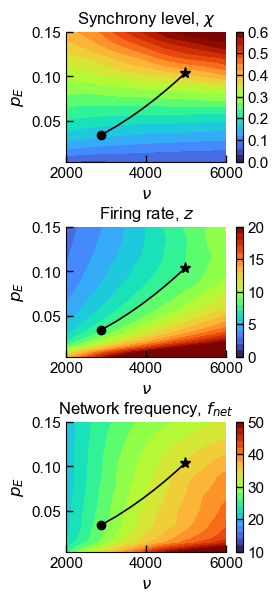

In [361]:
def _set_label():
    plt.xlabel(r"$\nu$", fontsize=12)
    plt.ylabel(r"$p_E$", fontsize=12)
    plt.xticks(np.arange(2000, 6001, 2000))
    plt.xlim([2000, 6000])
    plt.yticks([0.05, 0.1, 0.15])

def draw_echelon():
    ysub = y[(y>=pl[0]) & (y<=pl[1])]
    xsub = d*np.sqrt(ysub)
    plt.plot(xsub, ysub, "k")
    plt.plot(xsub[0], ysub[0], "ko", markersize=6)
    plt.plot(xsub[-1], ysub[-1], "k*", markersize=8)
    print(xsub[-1].data, ysub[-1].data)

da = da_slow
d = 15450.58
pl = (0.028, 0.105)

plt.figure(figsize=(2.5, 6.5))

# Synchrony level
plt.axes((0.1, 0.7, 0.8, 0.2))
im_array = da.sel(dict(vars="chi"))
show_contourf(im_array, vmin=0, vmax=0.6)
plt.title(r"Synchrony level, $\chi$", fontsize=12)
draw_echelon()
_set_label()

# Firing rate
plt.axes((0.1, 0.4, 0.8, 0.2))
im_array = da.sel(dict(vars="fr"))
show_contourf(im_array, vmin=0, vmax=20, dc=5)
plt.title(r"Firing rate, $z$", fontsize=12)
draw_echelon()
_set_label()

# Network frequency
plt.axes((0.1, 0.1, 0.8, 0.2))
im_array = da.sel(dict(vars="fnet"))
show_contourf(im_array, vmin=10, vmax=50, dc=10)
plt.title(r"Network frequency, $f_{net}$", fontsize=12)
draw_echelon()
_set_label()

uf.save_fig("fig1_param_space_Slow")
plt.show()

# Sample spectrogram

In [304]:
sdata = uf.load_pickle("../three_pop_mpi/simulation_data/sample_detail.pkl")
detail = sdata["detail"]

psd_f, fpsd, tpsd = hhsignal.get_stfft(detail["vlfp"][1], detail["ts"], 2000, frange=(10, 90))
psd_s, fpsd, tpsd = hhsignal.get_stfft(detail["vlfp"][2], detail["ts"], 2000, frange=(10, 90))

In [ ]:
plt.figure(figsize=(3, 2.5))
plt.imshow(psd_f, aspect="auto", cmap="jet", origin="lower",
           vmin=0, vmax=0.8,
           extent=(tpsd[0], tpsd[-1], fpsd[0], fpsd[-1]),
          interpolation="bicubic")
plt.xticks(np.arange(1, 5))
plt.yticks(np.arange(10, 91, 10))
plt.colorbar()
plt.ylim([20, 80])

plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("Frequency (Hz)", fontsize=12)
plt.title("LFP spectrogram\n (a.u.)", fontsize=12)

uf.save_fig("LFP spec (Fast)")
plt.show()

Saved figure to LFP spec (Slow)


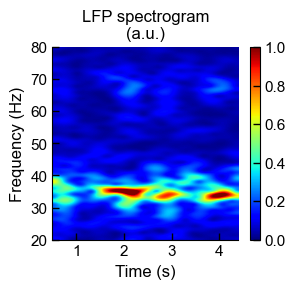

In [372]:
plt.figure(figsize=(3, 2.5))
plt.imshow(psd_s, aspect="auto", cmap="jet", origin="lower",
           vmin=0, vmax=1,
           extent=(tpsd[0], tpsd[-1], fpsd[0], fpsd[-1]),
          interpolation="bicubic")
plt.xticks(np.arange(1, 5))
plt.yticks(np.arange(10, 91, 10))
plt.colorbar()
plt.ylim([20, 80])

plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("Frequency (Hz)", fontsize=12)
plt.title("LFP spectrogram\n(a.u.)", fontsize=12)

uf.save_fig("LFP spec (Slow)")
plt.show()

# Bursting activity
Run [extracting code](../three_pop_mpi/extract_burstprobs_discon.py) first

In [2]:
import pickle as pkl
from numba import njit
from scipy.ndimage import gaussian_filter


def hist2d(y, x, yedges, xedges):
    idx = np.digitize(x, xedges, right=False)
    idy = np.digitize(y, yedges, right=False)
    
    id_nan = (idx==0) | (idx==len(xedges))
    id_nan = id_nan | (idy==0)
    id_nan = id_nan | (idy==len(yedges))

    idx = idx[~id_nan]-1
    idy = idy[~id_nan]-1
    
    matsize = (len(yedges)-1, len(xedges)-1)
    num_hist = _count(matsize, idx, idy)
    return num_hist
    
    
# @njit
def _count(matsize, idx, idy):
    num = np.zeros(matsize)
    for n in range(len(idx)):
        num[idy[n], idx[n]] += 1
    return num


def get_mid_pts(edges):
    return (edges[1:] + edges[:-1])/2


bdata = uf.load_pickle("../three_pop_mpi/simulation_data/burst_prop2.pkl")
mbin_t = bdata["attrs"]["mbin_t"]

In [3]:
nid = 0

bf = np.array(bdata['burst_props'][nid]['burst_f'])
bl = np.array(bdata['burst_props'][nid]['burst_len'])
ba = np.array(bdata['burst_props'][nid]['burst_amp'])

idx = bl*mbin_t >= 3/bf
bf = bf[idx]
ba = ba[idx]

xedges = np.linspace(0.2, 1.6, 21)
yedges = np.linspace(35, 105, 21)

im = hist2d(bf, ba, yedges, xedges)
im = gaussian_filter(im, 0.8)
x = get_mid_pts(xedges)
y = get_mid_pts(yedges)

Saved figure to fig1_burst prop_fast


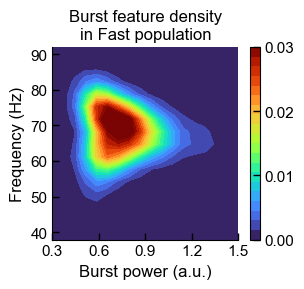

In [4]:
plt.figure(figsize=(3, 2.5))
plt.contourf(x, y, im/im.sum(), 
             np.concatenate((np.linspace(0,0.03,21),[1])),
             cmap="turbo", 
             vmax=0.03, vmin=0)
cbar = plt.colorbar(ticks=[0,0.01,0.02,0.03])
cbar.ax.set_ylim([0, 0.03])

plt.xticks(np.arange(0.3, 1.51, 0.3))
plt.yticks(np.arange(40, 101, 10))
plt.xlim([0.3, 1.5])
plt.ylim([38, 92])

plt.xlabel("Burst power (a.u.)", fontsize=12)
plt.ylabel("Frequency (Hz)", fontsize=12)
plt.title("Burst feature density\nin Fast population", fontsize=12) # chi=0.4

uf.save_fig("fig1_burst prop_fast")
plt.show()

In [7]:
xedges = np.linspace(0.2, 3.1, 21)
yedges = np.linspace(20, 50, 21)

im = hist2d(bf, ba, yedges, xedges)
im = gaussian_filter(im, 1)
x = get_mid_pts(xedges)
y = get_mid_pts(yedges)

nid = 1

bf = np.array(bdata['burst_props'][nid]['burst_f'])
bl = np.array(bdata['burst_props'][nid]['burst_len'])
ba = np.array(bdata['burst_props'][nid]['burst_amp'])

idx = bl*mbin_t >= 3/bf
bf = bf[idx]
ba = ba[idx]

Saved figure to fig1_burst prop_slow


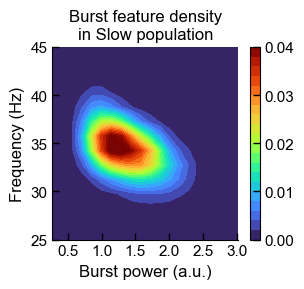

In [9]:
plt.figure(figsize=(3, 2.5))
plt.contourf(x, y, im/im.sum(),
             np.concatenate((np.linspace(0,0.04,21),[1])),
             cmap="turbo",
             vmax=0.04, vmin=0)
cbar = plt.colorbar(ticks=[0,0.01,0.02,0.03,0.04])
cbar.ax.set_ylim([0, 0.04])

plt.xticks(np.arange(0.5, 3.1, 0.5))
plt.yticks(np.arange(20, 51, 5))
plt.ylim([25, 45])

plt.xlabel("Burst power (a.u.)", fontsize=12)
plt.ylabel("Frequency (Hz)", fontsize=12)
plt.title("Burst feature density\nin Slow population", fontsize=12) # chi=0.4

uf.save_fig("fig1_burst prop_slow")
plt.show()

In [11]:
raise NameError(

False